## Linear Regression

In [2]:
import numpy as np
import hnumpy as hnp
import matplotlib.pyplot as plt

In [5]:
N = 32
X = np.linspace(0,1,N)

In [27]:
def getY(X):
    return 0.2 + X * 0.42 + np.random.uniform(-0.05, 0.05, len(X))

### Ground Truth Data

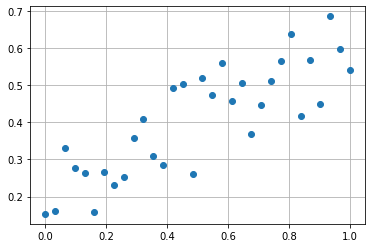

In [18]:
y0 = getY(X)

plt.plot(X,y0,"o")
plt.grid()
plt.show()

In [19]:
k,d = np.polyfit(X,y0,1)
print(f"k = {k:.4f}\nd = {d:.4f}")

k = 0.4091
d = 0.2025


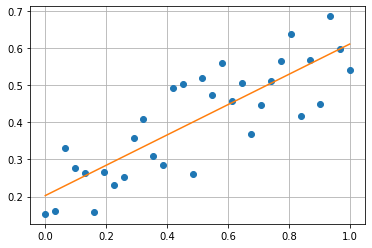

In [20]:
plt.plot(X,y0,"o")
plt.plot([0,1],[d, k+d])
plt.grid()
plt.show()

## Mean Formulas

In [8]:
def lr_k(y):
    return np.sum(np.multiply(X-np.mean(X),y-np.mean(y))) / np.sum((X-np.mean(X))**2)

def lr_d(y):
    return np.mean(y) - np.sum(np.multiply(X-np.mean(X),y-np.mean(y))) / np.sum((X-np.mean(X))**2) * np.mean(X)

he_k = hnp.compile_fhe(
    lr_k,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

he_d = hnp.compile_fhe(
    lr_d,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

2022-01-18 08:46:16.851 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling lr_k into an FHE function
2022-01-18 08:46:16.853 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 08:46:16.855 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-18 08:46:16.857 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-18 08:46:16.883 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-18 08:46:16.884 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-18 08:46:16.886 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-18 08:46:16.887 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling lr_d into an FHE function
2022-01-18 08:46:16.887 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 08:46:16.889 | INFO     | hnumpy.convert:compile_homomorphic:

In [9]:
# Check implementation
k = lr_k(y0)
d = lr_d(y0)

print(f"k = {k:.4f}\nd = {d:.4f}")

k = 0.4745
d = 0.1674


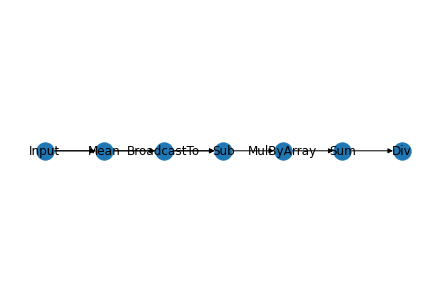

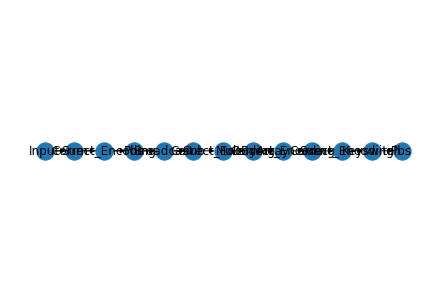

In [10]:
he_k.draw_intermediate_graph()

he_k.draw_target_graph()

In [163]:
# he_k.export_compilation_report()

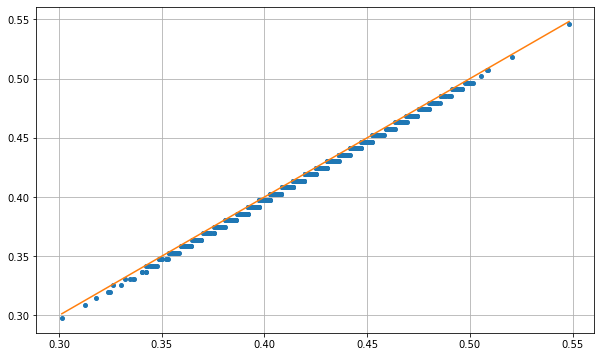

In [13]:
expected = []
simulate = []

rounds = 1000
for r in range(rounds):
    y = getY(X)
    
    exp_res = lr_k(y)
    sim_res = he_k.simulate(y)
    
    expected.append(exp_res)
    simulate.append(sim_res)
    
plt.figure(figsize=(10,6))
plt.plot(expected,simulate, "o", markersize=4)
_x = np.linspace(min(expected),max(expected),100)
plt.plot(_x,_x)
plt.grid()
plt.show()

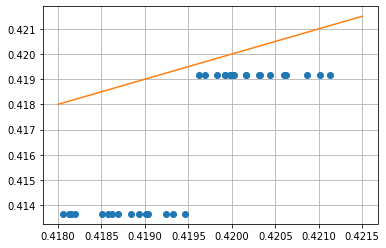

In [14]:
xmin = 0.418
xmax = 0.4215

zoom = [(x,y[0]) for x,y in zip(expected,simulate)]
zoom_x = [x for (x,_) in zoom if x > xmin and x < xmax]
zoom_y = [y for (x,y) in zoom if x > xmin and x < xmax]

plt.plot(zoom_x, zoom_y, "o")
plt.plot([xmin,xmax],[xmin,xmax])
plt.grid()
plt.show()

## David formulas

In [25]:
def lr_k_david(y):
    d = N * np.dot(X,X) - np.sum(X)**2
    alpha_i = np.array([N*xi-np.sum(X) for xi in X]) / d
    
    a = np.sum(alpha_i * y)
    # a = np.dot(alpha_i,y)
    
    return a

def lr_d_david(y):
    d = N * np.dot(X,X) - np.sum(X)**2
    beta_i  = np.array([np.sum(X**2) - xi*np.sum(X) for xi in X]) / d
    b = np.sum(beta_i * y)
    return b

he_k_david = hnp.compile_fhe(
    lr_k_david,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

he_d_david = hnp.compile_fhe(
    lr_d_david,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

2022-01-18 14:13:47.683 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling lr_k_david into an FHE function
2022-01-18 14:13:47.684 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 14:13:47.686 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-18 14:13:47.687 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-18 14:13:47.697 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-18 14:13:47.698 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-18 14:13:47.701 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-18 14:13:47.703 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling lr_d_david into an FHE function
2022-01-18 14:13:47.704 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 14:13:47.706 | INFO     | hnumpy.convert:compile_

In [22]:
# Check implementation
k = lr_k_david(y0)
d = lr_d_david(y0)

print(f"k = {k:.4f}\nd = {d:.4f}")

k = 0.4745
d = 0.1674


In [23]:
def lr_k_david_extra(y,z):
    d = N * np.dot(X,X) - np.sum(X)**2
    alpha_i = np.array([N*xi-np.sum(X) for xi in X]) / d
    
    alpha_enc = np.multiply(z,alpha_i)
    
    a = np.dot(alpha_enc, y)
    
    return (alpha_enc, a)

def lr_d_david_extra(y,z):
    d = N * np.dot(X,X) - np.sum(X)**2
    beta_i  = np.array([np.sum(X**2) - xi*np.sum(X) for xi in X]) / d
    
    beta_enc = np.multiply(z,beta_i)
    
    b = np.dot(beta_enc, y)
    
    return b


he_k_david_extra = hnp.compile_fhe(
    lr_k_david_extra,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)),
      "z": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,))}
)

he_d_david_extra = hnp.compile_fhe(
    lr_d_david_extra,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)),
      "z": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,))
    }
)

2022-01-18 14:13:40.203 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling lr_k_david_extra into an FHE function
2022-01-18 14:13:40.204 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 14:13:40.206 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-18 14:13:40.208 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-18 14:13:40.227 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-18 14:13:40.228 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-18 14:13:40.230 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-18 14:13:40.232 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling lr_d_david_extra into an FHE function
2022-01-18 14:13:40.232 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 14:13:40.235 | INFO     | hnumpy.conv

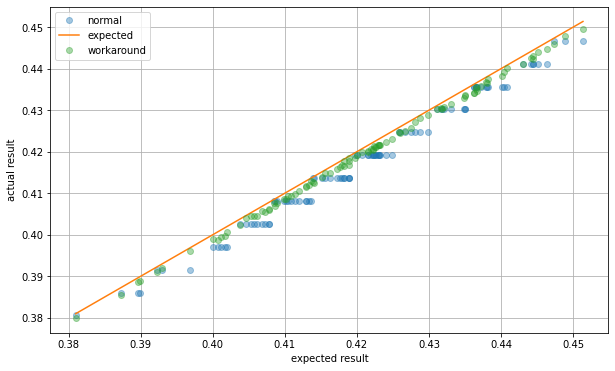

In [28]:
expected = []
simulate = []
simulate_x = []

X = np.linspace(0,1,N)
Z = np.ones(N)
N = 32
rounds = 100
for _ in range(rounds):

    y = getY(X)

    exp_alpha, exp_a = lr_k_david_extra(y,Z)
    
    alphas_x, a_x = he_k_david_extra.simulate(y,Z)
    
    a = he_k_david.simulate(y,Z)
    
    expected.append(exp_a)
    simulate.append(a)
    simulate_x.append(a_x)
    
plt.figure(figsize=(10,6))
plt.plot(expected,simulate,"o",markersize=6,alpha=0.4,label="normal")
_x = np.array([min(expected),max(expected)])
plt.plot(_x,_x,label="expected")
plt.plot(expected,simulate_x,"o",markersize=6,alpha=0.4,label="workaround")
plt.grid()
plt.legend()
plt.xlabel("expected result")
plt.ylabel("actual result")
plt.show()

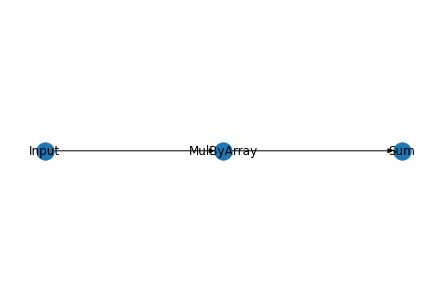

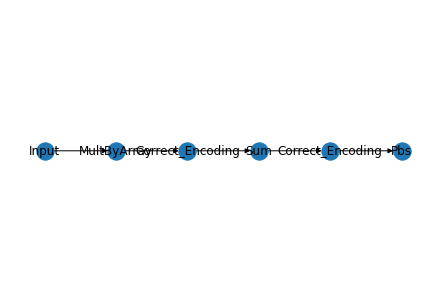

In [28]:
he_k_david.draw_intermediate_graph()

he_k_david.draw_target_graph()

In [170]:
# he_k_david.export_compilation_report()

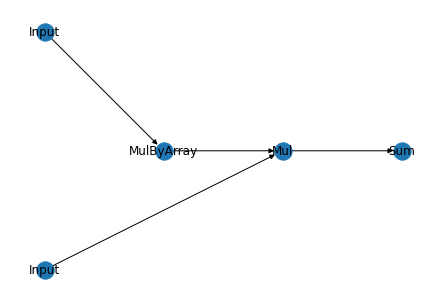

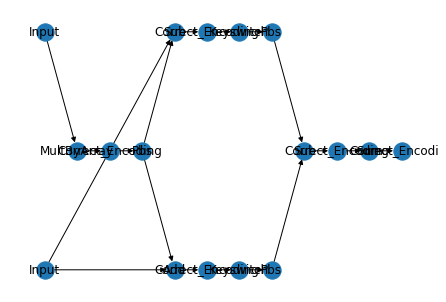

In [29]:
he_k_david_extra.draw_intermediate_graph()

he_k_david_extra.draw_target_graph()

# he_k_david_extra.export_compilation_report()

### calculate d with workaround

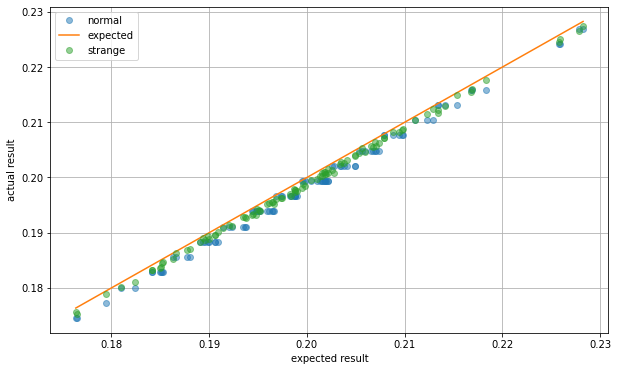

In [38]:
expected = []
simulate = []
simulate_x = []

N = 32
X = np.linspace(0,1,N)
Z = np.ones(N)
rounds = 100
for _ in range(rounds):

    y = getY(X)

    exp_b = lr_d_david_extra(y,Z)
    
    b_x = he_d_david_extra.simulate(y,Z)
    
    b = he_d_david.simulate(y,Z)
    
    expected.append(exp_b)
    simulate.append(b)
    simulate_x.append(b_x)
    
plt.figure(figsize=(10,6))
plt.plot(expected,simulate,"o",markersize=6,alpha=0.5,label="normal")
_x = np.array([min(expected),max(expected)])
plt.plot(_x,_x,label="expected")
plt.plot(expected,simulate_x,"o",markersize=6,alpha=0.5,label="strange")
plt.grid()
plt.legend()
plt.xlabel("expected result")
plt.ylabel("actual result")
plt.show()

### mean error of k and d

In [10]:
def linreg_dd(y):
    d = N * np.dot(X,X) - np.sum(X)**2
    alpha_i = np.array([N*xi-np.sum(X) for xi in X]) / d
    beta_i  = np.array([np.sum(X**2) - xi*np.sum(X) for xi in X]) / d
    
    a = np.sum(alpha_i * y)
    b = np.sum(beta_i * y)
    
    return (a,b)

def linreg_dd_xl(y,z):
    d = N * np.dot(X,X) - np.sum(X)**2
    alpha_i = np.array([N*xi-np.sum(X) for xi in X]) / d
    beta_i  = np.array([np.sum(X**2) - xi*np.sum(X) for xi in X]) / d
    
    alpha_enc = np.multiply(z,alpha_i)
    beta_enc  = np.multiply(z,beta_i)
    
    a = np.dot(alpha_enc, y)
    b = np.dot(beta_enc, y)
    
    return (a,b)
    
he_linreg = hnp.compile_fhe(
    linreg_dd,
    {
        "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)),
    }
)

he_linreg_xl = hnp.compile_fhe(
    linreg_dd_xl,
    {
        "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)),
        "z": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,))
    }
)

2022-01-18 14:03:42.350 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling linreg_dd into an FHE function
2022-01-18 14:03:42.352 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 14:03:42.355 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-18 14:03:42.357 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-18 14:03:42.378 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-18 14:03:42.379 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-18 14:03:42.381 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-18 14:03:42.382 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling linreg_dd_xl into an FHE function
2022-01-18 14:03:42.383 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-18 14:03:42.385 | INFO     | hnumpy.convert:compile

In [21]:
a_err, a_err_xl, b_err, b_err_xl = [],[],[],[]

N = 32
X = np.linspace(0,1,N)
z = np.ones(N)
rounds = 1000
for _ in range(rounds):

    y = getY(X)

    a,b = linreg_dd(y)
    
    a_enc, b_enc = he_linreg.simulate(y)
    a_enc_xl, b_enc_xl = he_linreg_xl.simulate(y,z)
    
    a_err.append((np.abs(a_enc - a), np.abs(a_enc - a)/a))
    a_err_xl.append((np.abs(a_enc_xl - a), np.abs(a_enc_xl - a)/a))
    
    b_err.append((np.abs(b_enc - b), np.abs(b_enc - b)/b))
    b_err_xl.append((np.abs(b_enc_xl - b), np.abs(b_enc_xl - b)/b))
    

print(f"Standard Formula:")
print(f"abs mean error: (a) {np.mean([e for e,_ in a_err]):.4f}, (b) {np.mean([e for e,_ in b_err]):.4f}")
print(f"rel mean error: (a) {np.mean([e for _,e in a_err]):.4f}, (b) {np.mean([e for _,e in b_err]):.4f}")
print()
print(f"Workaround Formula:")
print(f"abs mean error: (a) {np.mean([e for e,_ in a_err_xl]):.4f}, (b) {np.mean([e for e,_ in b_err_xl]):.4f}")
print(f"rel mean error: (a) {np.mean([e for _,e in a_err_xl]):.4f}, (b) {np.mean([e for _,e in b_err_xl]):.4f}")

Standard Formula:
abs mean error: (a) 0.0036, (b) 0.0017
rel mean error: (a) 0.0088, (b) 0.0088

Workaround Formula:
abs mean error: (a) 0.0017, (b) 0.0010
rel mean error: (a) 0.0042, (b) 0.0052
